# Concept

## Steps

CNN involves two steps: **feature learning** and **classification**

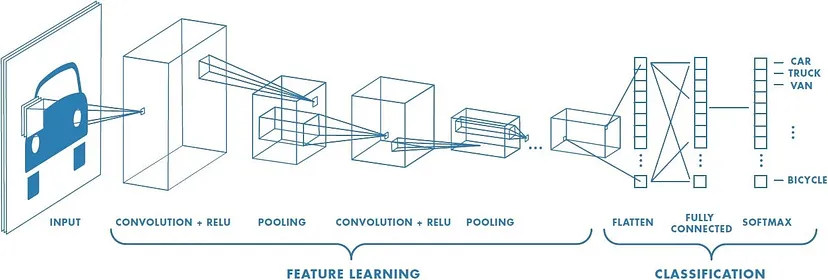

* Feature learning is a step where various **filters** (aka kernels aka weights) and **layers** are applied to the images to **extract the informations and features** out of it.

* Classification is a step where the results are **classified based on the target variable** of the problem.

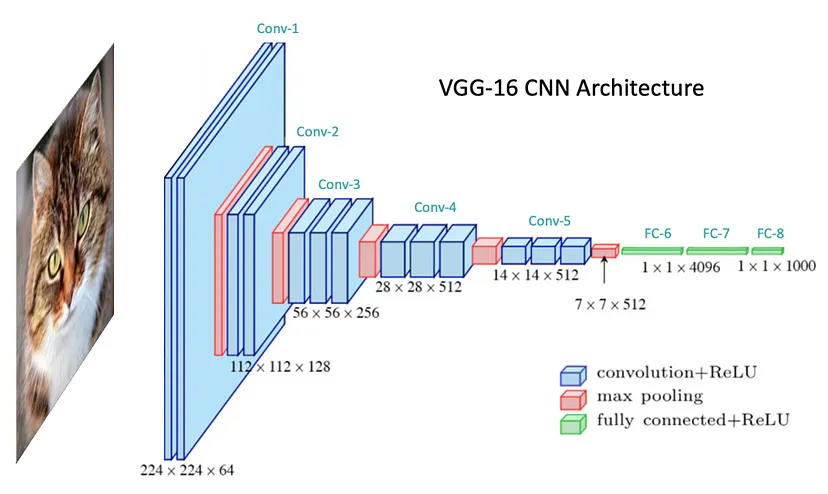

## CNN Layers

- input layer
- convolutional layer
- pooling layer
- fully-connected layer

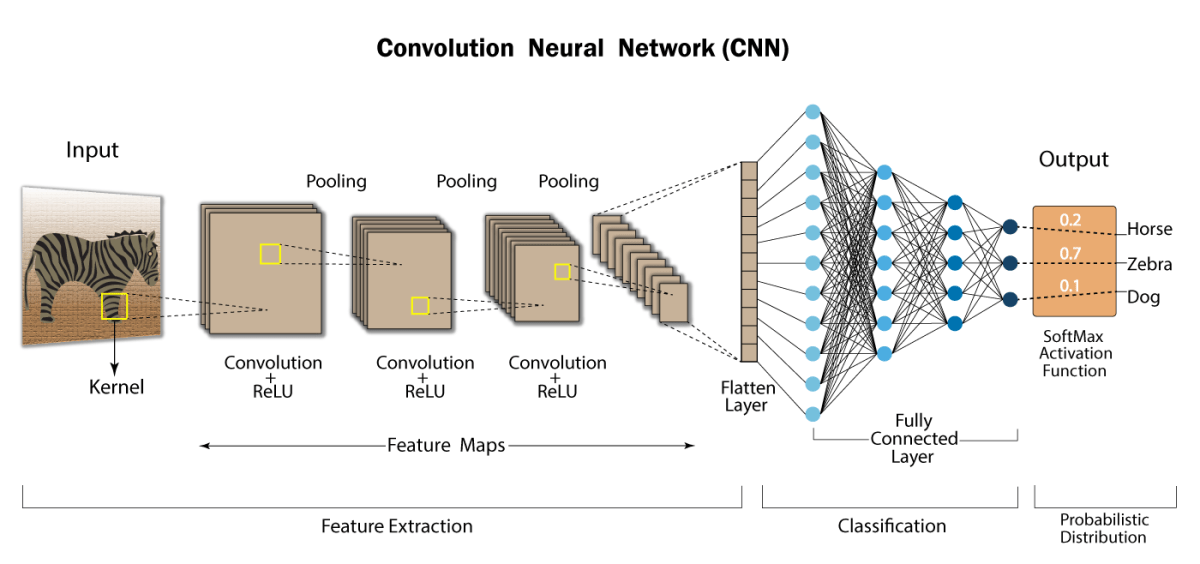

### Input Layer

This is the input image which can be grayscale or RGB. Every image is made up of pixels that range from 0-255 and should be normalized afterwards (for example, to range 0-1)

Example of input layer

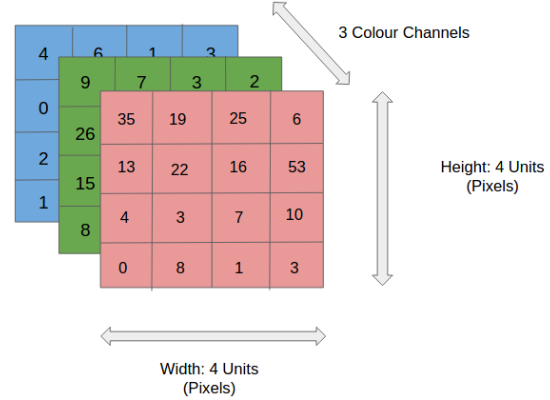

### Convolutional Layer


Layer where the filter/kernel is applied to the input image to extract its informations. This is based on the convolutional concept. This layer consists of input, filter, and feature map.


Example of convolution process in the convolutional layer. Each matrix represent input, filter, and feature map, respectively.

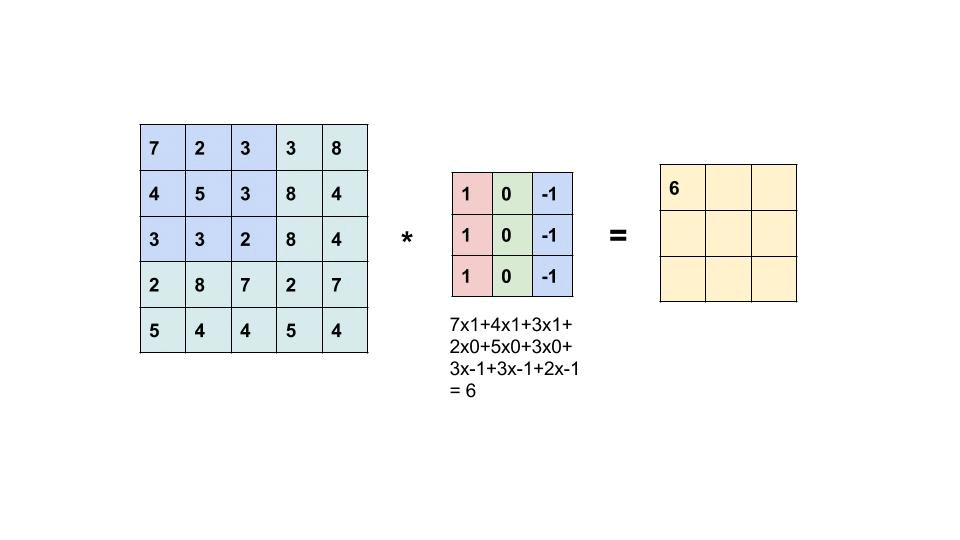

The filter then passes through the entire images as shown below.

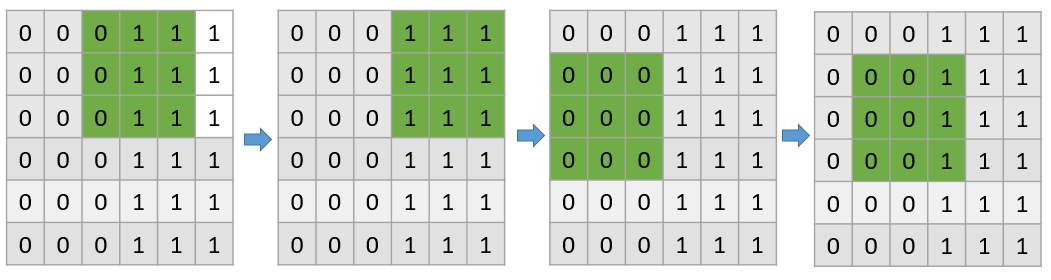

Important parameters
- number of filters $\rightarrow$ depth of the feature map
- stride $\rightarrow$ pixels number
- zero padding $\rightarrow$ when filter doesnt match the input. this will set the outer element to zero
    - valid padding $\rightarrow$ last convolution is dropped
    - same padding $\rightarrow$ output layer == input layer (in terms of size)
    - full pading $\rightarrow$ adding zero, increasing the feature map size

After we get the feature map, an activation function is applied to it for introducing nonlinearity. The most common used is Rectified Linear Unit (ReLU).

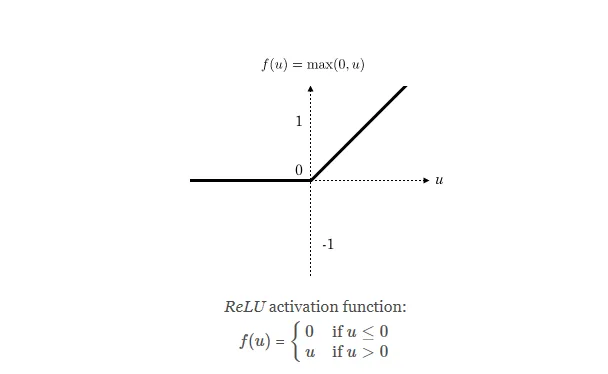

### Pooling Layer
This layer is used to reduce the dimensions of the feature map (lower resolution), thus help (1) preserves the important information and (2) reduce the computation time. 

The most common used are
- max pooling: choose pixels with the highest value
- average pooling: compute the average value

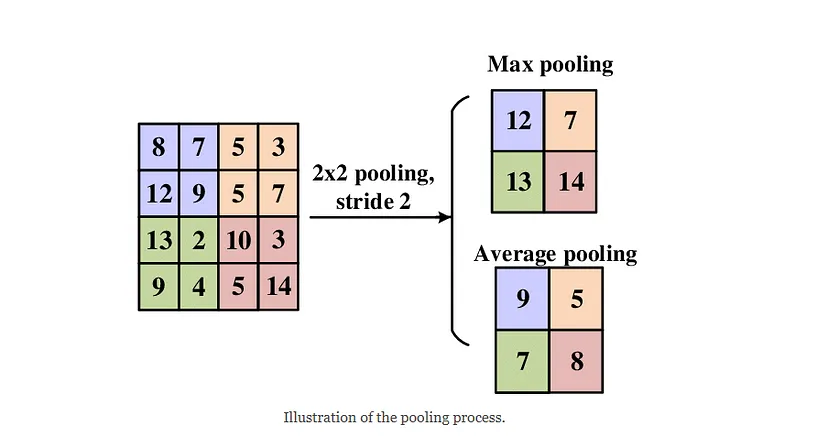

### Fully Connected Layer
This layer is the Classification part, which is used for classifying the results of Feature Learning step into a label. With this process, we could classify the input image into the desired label. To do so, we use Softmax function, which will give a probability from 0 to 1 for each possible label in a given input image.

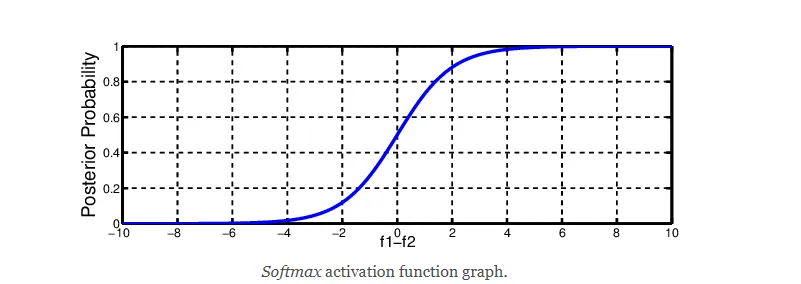

# Code

## Data Pre-Processing

loading the data. here we use Mnist Digit Classification dataset

In [1]:
from tensorflow.keras.datasets import mnist
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

for example, this is one sample input image

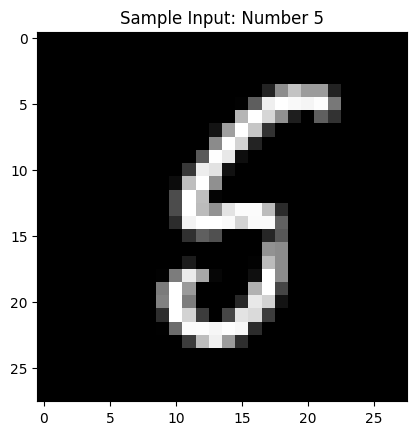

In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# setting up IPython
%matplotlib inline

# choosing random sample
sample = np.random.randint(0, len(X_train)) # random number
image = X_train[sample]                     # sample image
number = y_train[sample]                    # sample number

# showing the sample image
plt.figure()
plt.imshow(image, cmap="gray")
plt.title("Sample Input: Number %d" %number)
plt.show()

here we can see the number and the shape of the data

In [3]:
print('Training data shape : ', X_train.shape, ",", y_train.shape)
print('Testing data shape : ', X_test.shape, ",", y_test.shape)

Training data shape :  (60000, 28, 28) , (60000,)
Testing data shape :  (10000, 28, 28) , (10000,)


for example, one data will look like this

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

because the input data is 2D array with size 28 x 28, we have to convert it into 3D array with size 28 x 28 x 1

In [5]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

now the data have this shape

In [6]:
print("Shape of the X_train data: ", X_train.shape)
print("Shape of the X_test data = ", X_test.shape)

Shape of the X_train data:  (60000, 28, 28, 1)
Shape of the X_test data =  (10000, 28, 28, 1)


for example

In [7]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [8]:
X_train.shape

(60000, 28, 28, 1)

Once reshaping is done, we will normalize the pixel values by dividing each element with 255

In [9]:
X_train = X_train / 255
X_test = X_test / 255

The first step is to split the training data into two parts, one for training and another one for validation. In this case we use 80% of the data for training.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

Here we can see the shape after the data is split


In [11]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

## The Network


We will use 3 convolutional layers:
- first layer: 32 of 3x3 filters
- second layer: 64 of 3x3 filters
- third layer 128 of 3x3 filters

This is the architecture of the model

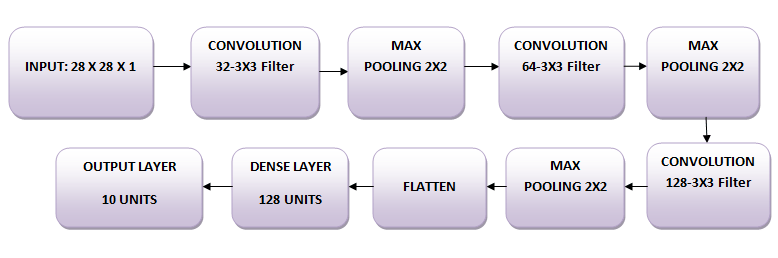

this is the required modules to build the network

In [12]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

the model will use a batch size of 64 and is trained for 20 epochs

In [13]:
batch_size = 64
epochs = 20
num_classes = 10

next, we build the model using Sequential() object to ensure all the layers are added sequentially

In [14]:
model = Sequential()

now, add the layers sequentially

In [15]:
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

then we complile the model using Adam optimizer, with specification shown below

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

we can see the arcchitecture of the model below

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

after the network is built, we can train the model using `fit()` function for 20 epochs

In [18]:
model_train = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
750/750 [==============================] - 38s 49ms/step - loss: 0.1622 - accuracy: 0.9507 - val_loss: 0.0590 - val_accuracy: 0.9826
Epoch 2/20
750/750 [==============================] - 36s 48ms/step - loss: 0.0451 - accuracy: 0.9870 - val_loss: 0.0436 - val_accuracy: 0.9858
Epoch 3/20
750/750 [==============================] - 36s 48ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 4/20
750/750 [==============================] - 36s 49ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 5/20
750/750 [==============================] - 36s 48ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0423 - val_accuracy: 0.9883
Epoch 6/20
750/750 [==============================] - 37s 49ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0371 - val_accuracy: 0.9889
Epoch 7/20
750/750 [==============================] - 37s 49ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0369 - val_accuracy:

## Model Evaluation


after the model is trained, we can evaluate it using test data

In [19]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.034628499299287796
Test accuracy: 0.9936000108718872


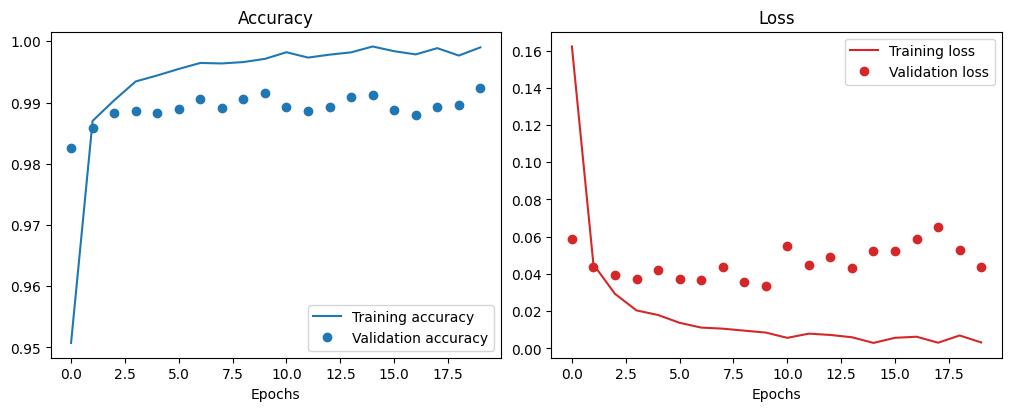

In [34]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))

fig, (ax1, ax2) = plt.subplots(figsize=(10,4), ncols=2, constrained_layout=True)
ax1.plot(epochs, accuracy, label='Training accuracy', color='tab:blue')
ax1.plot(epochs, val_accuracy, marker='o', ls='', label='Validation accuracy', color='tab:blue')
ax1.set_title('Accuracy')

ax2.plot(epochs, loss, label='Training loss', color='tab:red')
ax2.plot(epochs, val_loss, marker='o', ls='', label='Validation loss', color='tab:red')
ax2.set_title('Loss')
ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
plt.show()

## Predict Labels

we use np.argmax() to select the index number which has a higher value in a row. 


For example:
0 1 0 0 0 0 0 0 0 0 $\rightarrow$ 1

In [35]:
predicted_classes = model.predict(X_test)

predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

313/313 [==============================] - 3s 9ms/step


In [36]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

now we can calculate how much the model can predict the data correctly

Found 9935 correct labels


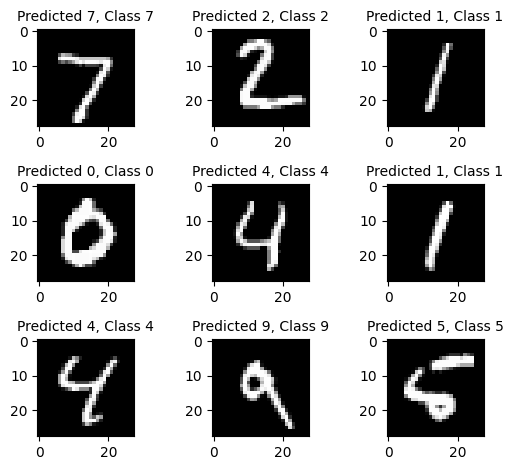

In [40]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]), fontsize=10)
    plt.tight_layout()

and the incorrect ones

Found 65 incorrect labels


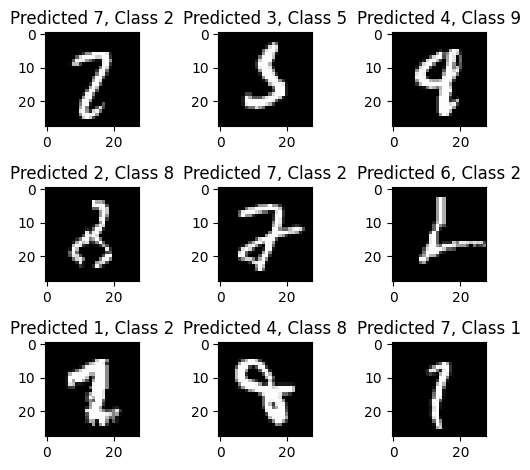

In [41]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

## Classification Report

In [42]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       980
     Class 1       1.00      1.00      1.00      1135
     Class 2       1.00      0.99      0.99      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       0.99      1.00      0.99       982
     Class 5       1.00      0.99      0.99       892
     Class 6       1.00      0.99      0.99       958
     Class 7       0.99      1.00      0.99      1028
     Class 8       1.00      0.99      0.99       974
     Class 9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

